In [1]:
from datetime import datetime
from portfolio.equity_portfolio import EquityPortfolio
from analyzer.analyzer import Analyzer as a
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = datetime(2016,1,1)
end = datetime(2017,1,1)

In [3]:
ep = EquityPortfolio(start,end,"portfolio",seats=5,strats=
                    {
                        "rolling_percent":{"params":{"timeframe":"daily"
                ,"requirement":5
                ,"days":100
                ,"value":False
                ,"currency":"prices"}},
                            "progress_report":{"params":{"timeframe":"quarterly"
                    ,"requirement":10}},
                    "financial_predict":{"params":{}},
                    })

In [4]:
ep.strats

{'rolling_percent': {'params': {'timeframe': 'daily',
   'requirement': 5,
   'days': 100,
   'value': False,
   'currency': 'prices'}},
 'progress_report': {'params': {'timeframe': 'quarterly', 'requirement': 10}},
 'financial_predict': {'params': {}}}

In [5]:
ep.load()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.96s/it]


In [6]:
ep.transform()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.21s/it]


In [7]:
ep.sim()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:25<00:00,  6.37s/it]


In [6]:
trades = ep.backtest()

financial_predict_sim_year:   0%|                                                                                                     | 0/2 [00:00<?, ?it/s]

2016 1 Industrials 74 1085 69


 67%|████████████████████████████████████████████████████████████████████████████████▋                                        | 2/3 [00:20<00:10, 10.18s/it]


KeyboardInterrupt: 

In [13]:
trades["strategy"].unique()

array(['rolling_percent', 'progress_report'], dtype=object)

In [17]:
trades

,date,adjclose,ticker,seat,sell_date,sell_price,timeframe,requirement,days,value,currency,strategy,delta,quarter,year
0,2017-01-03,11.430000,AMD,0,2017-02-01,12.001500,daily,5,100.0,False,prices,rolling_percent,0.05,1,2017
1,2017-02-02,20.650000,UAA,0,2017-02-09,21.682500,daily,5,100.0,False,prices,rolling_percent,0.05,1,2017
2,2017-02-10,13.580000,AMD,0,2017-02-22,14.259000,daily,5,100.0,False,prices,rolling_percent,0.05,1,2017
3,2017-02-23,21.670000,UAA,0,2017-06-12,22.753500,daily,5,100.0,False,prices,rolling_percent,0.05,2,2017
4,2017-06-13,37.448843,NVDA,0,2017-06-21,39.321285,daily,5,100.0,False,prices,rolling_percent,0.05,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2017-03-30,69.080000,QRVO,9,2017-05-22,75.988000,quarterly,10,NaN,NaN,NaN,progress_report,0.10,2,2017
82,2017-05-23,18.020041,ROL,9,2017-10-06,19.822045,quarterly,10,NaN,NaN,NaN,progress_report,0.10,4,2017
83,2017-10-20,48.745231,NVDA,9,2017-11-24,53.619754,quarterly,10,NaN,NaN,NaN,progress_report,0.10,4,2017
84,2017-11-27,77.840000,PYPL,9,2018-06-18,85.624000,quarterly,10,NaN,NaN,NaN,progress_report,0.10,2,2018


In [14]:
pva = a.pv_analysis(ep)
iva = a.industry_analysis(ep)

KeyError: 'financial_predict'

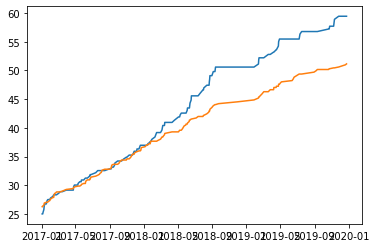

In [15]:
plt.plot(pva["date"],pva["progress_report"])
plt.plot(pva["date"],pva["rolling_percent"])
plt.plot(pva["date"],pva["financial_predict"])
plt.plot(pva["date"],pva["speculation"])
plt.legend([x for x in pva.columns if x != "date"])

In [16]:
pva

strategy,date,progress_report,rolling_percent
0,2017-01-03,25.000000,26.250000
1,2017-01-05,25.000000,26.381250
2,2017-01-06,25.250000,26.381250
3,2017-01-09,25.750000,26.512500
4,2017-01-10,26.250000,26.781563
...,...,...,...
159,2019-11-08,57.713018,50.450620
160,2019-11-11,58.913477,50.450620
161,2019-11-26,59.449374,50.602558
162,2019-12-20,59.449374,50.986499
